In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [20]:
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')

In [21]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
x=train.drop('label',axis=1).values
y=train['label'].values

In [23]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(42000, 784))

In [24]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset,Dataset

In [25]:
class MNISTDataset(Dataset):
    def __init__(self, data, labels):
        self.data = torch.tensor(data, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        image = self.data[idx].reshape(784) / 255.0
        label = self.labels[idx]
        return torch.tensor(image), torch.tensor(label)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


In [27]:
train_ds=MNISTDataset(X_train, y_train)
test_ds=MNISTDataset(X_test, y_test)


In [28]:
train_loader=DataLoader(train_ds,batch_size=64,shuffle=True)
test_loader=DataLoader(test_ds,batch_size=64,shuffle=False)

In [29]:
import torch.nn as nn

class MNISTModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(256, 128),
            nn.ReLU(),

            nn.Linear(128, 10)   # 10 classes
        )

    def forward(self, x):
        return self.net(x)


In [30]:
model = MNISTModel()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 10

In [31]:
epochs = 10

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()

        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15308\2749474121.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(image), torch.tensor(label)


Epoch 1, Loss: 205.1844
Epoch 2, Loss: 85.4801
Epoch 3, Loss: 61.3129
Epoch 4, Loss: 45.7518
Epoch 5, Loss: 38.6804
Epoch 6, Loss: 30.2983
Epoch 7, Loss: 26.7716
Epoch 8, Loss: 23.1364
Epoch 9, Loss: 20.7086
Epoch 10, Loss: 17.6458


In [32]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        predictions = outputs.argmax(dim=1)

        correct += (predictions == y_batch).sum().item()
        total += y_batch.size(0)

accuracy = correct / total
print("Test Accuracy:", accuracy)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15308\2749474121.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(image), torch.tensor(label)


Test Accuracy: 0.9763095238095238


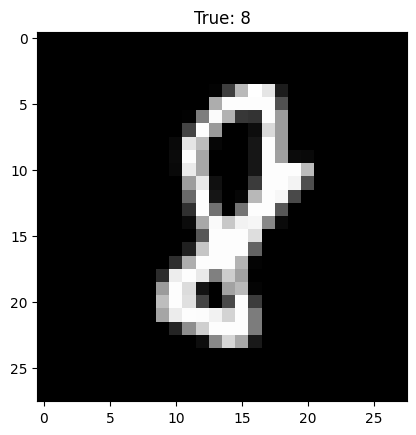

tensor([8])

In [34]:
import matplotlib.pyplot as plt

sample = X_test[0].reshape(28, 28)
plt.imshow(sample, cmap="gray")
plt.title(f"True: {y_test[0]}")
plt.show()

model(torch.tensor(X_test[0] / 255.0, dtype=torch.float32).unsqueeze(0)).argmax(dim=1)
